In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import torch
from torch.nn import *
%matplotlib inline

data = pd.read_csv("dataset.csv", encoding='utf-8')
# data.head()

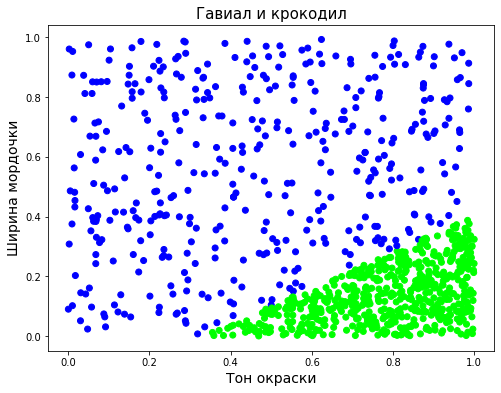

In [8]:
#show dataset

plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show();

In [9]:
X = data.iloc[:,:2].values[:] #признаки цвет и размер
Y = data['target'].values.reshape((-1, 1))[:]  #2 класса: 0 и 1


num_features = X.shape[1]
neuron = torch.nn.Sequential(
    Linear(num_features, out_features=1),
    Sigmoid()
)
neuron

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [10]:
neuron(torch.autograd.Variable(torch.FloatTensor([1, 1]))) #random
proba_pred = neuron(torch.autograd.Variable(torch.FloatTensor(X)))

#show data before predicting

# y_pred = proba_pred > 0.5
# y_pred = y_pred.data.numpy().reshape(-1)

# plt.figure(figsize=(8, 6))
# plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='brg')
# plt.title('Гавиал и крокодил', fontsize=15)
# plt.xlabel('Тон окраски', fontsize=14)
# plt.ylabel('Ширина мордочки', fontsize=14)
# plt.show();

In [11]:
X = torch.autograd.Variable(torch.FloatTensor(X))
Y = torch.autograd.Variable(torch.FloatTensor(Y))

loss_func = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-3
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
num_epochs = 500

for i in range(num_epochs):
    y_pred = neuron(X)
    loss = loss_func(y_pred, Y)
    print(f'Iter: {i} -> Loss: {loss.data}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Iter: 0 -> Loss: 259.6786804199219
Iter: 1 -> Loss: 251.16897583007812
Iter: 2 -> Loss: 244.22755432128906
Iter: 3 -> Loss: 238.40650939941406
Iter: 4 -> Loss: 233.3721466064453
Iter: 5 -> Loss: 228.88912963867188
Iter: 6 -> Loss: 224.79617309570312
Iter: 7 -> Loss: 220.9851531982422
Iter: 8 -> Loss: 217.38409423828125
Iter: 9 -> Loss: 213.9456329345703
Iter: 10 -> Loss: 210.63856506347656
Iter: 11 -> Loss: 207.442626953125
Iter: 12 -> Loss: 204.34445190429688
Iter: 13 -> Loss: 201.3352813720703
Iter: 14 -> Loss: 198.4092559814453
Iter: 15 -> Loss: 195.5623321533203
Iter: 16 -> Loss: 192.79159545898438
Iter: 17 -> Loss: 190.0947723388672
Iter: 18 -> Loss: 187.47003173828125
Iter: 19 -> Loss: 184.9156951904297
Iter: 20 -> Loss: 182.4300994873047
Iter: 21 -> Loss: 180.01170349121094
Iter: 22 -> Loss: 177.65899658203125
Iter: 23 -> Loss: 175.37033081054688
Iter: 24 -> Loss: 173.14404296875
Iter: 25 -> Loss: 170.97854614257812
Iter: 26 -> Loss: 168.87220764160156
Iter: 27 -> Loss: 166.8233

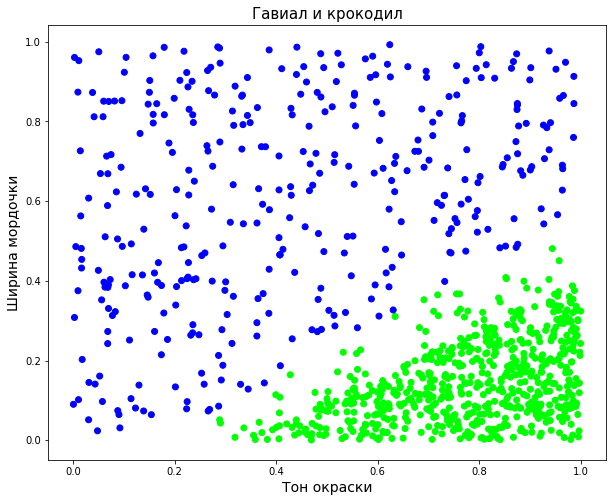

In [12]:
#testing
proba_pred = neuron(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show();